# Data Understanding


In [ ]:
import pandas as pd
import seaborn as sns

import numpy as np
pd.set_option('display.max_rows', 500)



In [ ]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [5]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,180615,180615,180688,180741,180784,180864,180864,180864,180864,181120
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,276342,276401,276415,276468,276518,276583,276638,276690,276731,276731
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265889,265897,265900,265904,265909,265920,265925,265925,265927,265937
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43067,43067,43067,43067,43224,43224,43224,43224,43224,43224
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8378,8378,8378,8378,8378,8406,8479,8479,8492,8531
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9230573,9276618,9276618,9276618,9276618,9276618,9276618,9276618,9276618,9276618
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422963,422963,423006,423006,423006,423006,423006,423006,423006,423006
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,134286,134286,136860,137664,138407,138919,139894,140519,140519,141660


In [6]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/4/22', '6/5/22', '6/6/22', '6/7/22', '6/8/22', '6/9/22', '6/10/22',
       '6/11/22', '6/12/22', '6/13/22'],
      dtype='object', length=874)

In [7]:
time_idx = pd_raw.columns[4:]

In [8]:
df_plot = pd.DataFrame({
    'date': time_idx })
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [9]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [10]:
pd_raw[pd_raw['Country/Region']== 'Germany'].iloc[: , 4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [11]:
country_list =['US',
              'Germany', 
               'Italy',
              'Spain',
               'korea, South']

In [12]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [13]:
df_plot.head()

,date,US,Germany,Italy,Spain,"korea, South"
0,1/22/20,1,0,0,0,0.0
1,1/23/20,1,0,0,0,0.0
2,1/24/20,2,0,0,0,0.0
3,1/25/20,2,0,0,0,0.0
4,1/26/20,5,0,0,0,0.0


<AxesSubplot:xlabel='date'>

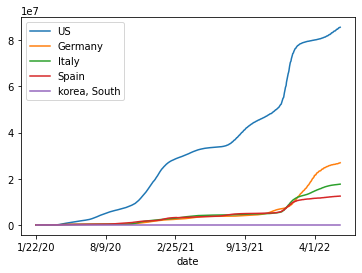

In [14]:
%matplotlib inline
df_plot.set_index('date').plot()
    

In [15]:
from datetime import datetime

In [16]:
df_plot.date[0]

'1/22/20'

In [17]:
time_idx = [datetime.strptime(each,"%m/%d/%y") for each in df_plot.date]
time_str= [each.strftime('%y-%m-%d') for each in time_idx]

In [18]:
df_plot.head()

,date,US,Germany,Italy,Spain,"korea, South"
0,1/22/20,1,0,0,0,0.0
1,1/23/20,1,0,0,0,0.0
2,1/24/20,2,0,0,0,0.0
3,1/25/20,2,0,0,0,0.0
4,1/26/20,5,0,0,0,0.0


In [19]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep = ';')

In [20]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180615,180615,180688,180741,180784,180864,180864,180864,180864,181120
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276342,276401,276415,276468,276518,276583,276638,276690,276731,276731
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265889,265897,265900,265904,265909,265920,265925,265925,265927,265937
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43067,43067,43067,43067,43224,43224,43224,43224,43224,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [21]:
pd_data_base = pd_raw.rename(columns= {'Country/Region': 'country',
                                       'Province/State': 'state'})

In [22]:
pd_data_base = pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,180615,180615,180688,180741,180784,180864,180864,180864,180864,181120
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276342,276401,276415,276468,276518,276583,276638,276690,276731,276731
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265889,265897,265900,265904,265909,265920,265925,265925,265927,265937
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43067,43067,43067,43067,43224,43224,43224,43224,43224,43224
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [23]:
test_pd= pd_data_base.set_index(['state', 'country']).T

In [24]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [25]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
249085,6/13/22,Western Australia,Australia,826139.0
249086,6/13/22,Xinjiang,China,1008.0
249087,6/13/22,Yukon,Canada,4415.0
249088,6/13/22,Yunnan,China,2157.0


In [26]:
pd_relational_model= pd_data_base.set_index(['state', 'country']) \
                              .T                                  \
                              .stack (level=[0,1])                \
                              .reset_index()                      \
                              .rename (columns={'level_0': 'date',
                                                 0: 'confirmed'}, )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [27]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [28]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [29]:
df_plot = pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep =';') 
df_plot.head()

,date,US,Germany,Italy,Spain,"korea, South"
0,1/22/20,1,0,0,0,0.0
1,1/23/20,1,0,0,0,0.0
2,1/24/20,2,0,0,0,0.0
3,1/25/20,2,0,0,0,0.0
4,1/26/20,5,0,0,0,0.0


<AxesSubplot:xlabel='date'>

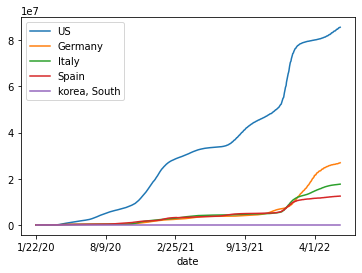

In [30]:
df_plot.set_index('date').plot()

In [31]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt 

In [32]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [33]:
sns.set(style= "darkgrid")

<Figure size 1152x648 with 0 Axes>

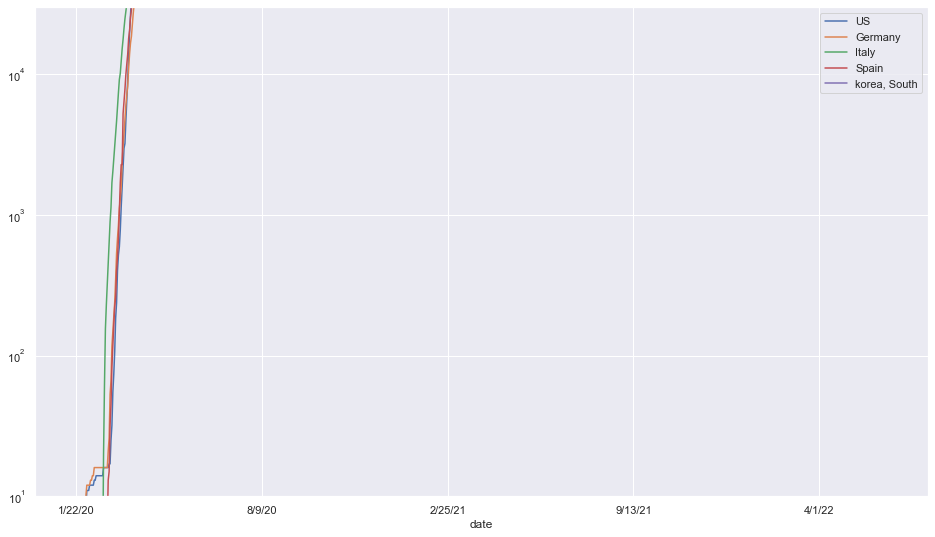

In [34]:
plt.figure();
ax= df_plot.iloc[:,:30].set_index('date').plot()
plt.ylim(10,30000)
ax.set_yscale('log')

In [35]:
import plotly.graph_objects as go

In [36]:
import plotly 
plotly.__version__

'5.8.2'

In [ ]:
fig = go.Figure()

In [39]:
fig = go.Figure()
for each in country_list:
    fig.add_trace(go.Scatter(x= df_plot.date,
                        y = df_plot[each],
                        mode ='markers+lines',
                        opacity =0.8 ,
                        line_width = 1.5 ,
                        marker_size = 2,     
                        name = each))
fig.update_layout(
    width = 1600 ,
    height= 1200,
    xaxis_title ='Time', 
     yaxis_title ='Confirmed cases of Infected people (Source Johns hopkind csse,log-scale)'
)
fig.update_yaxes(type="log",range =[1,6])

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['US', 'Spain'], 
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [44]:
from dash.dependencies import Input , Output
@app.callback(
   Output('main_window_slope','figure'),
   [Input('country_drop_down','value')])
def update_figure(country_list): 
    
    traces =[]
    for each in country_list:
        traces.append(dict(x= df_plot.date,
                        y = df_plot[each],
                        mode ='markers+lines',
                        opacity =0.8 ,
                        line_width = 1.5 ,
                        marker_size = 2,     
                        name = each))
        
    return {
            'data' : traces,
            'layout' : {design}
    }

In [ ]:
app.run_server(debug=True , use_reloader = False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
